<a href="https://colab.research.google.com/github/mariyam-ahmed/portfolio/blob/main/Math_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Executive Summary
This project aims to create a machine learning model that can predict the math score of students using various demographic and socioeconomic factors. The dataset used for training the model contains 14 variables and 25.6k instances. The variables are both categorical and continuous types.

First, exploratory data analysis was performed to intuit the relationships between factors. The distributions of the target and predictors were explored. A pairplot was also used to display the correlation between them.

Next, data pre-processing was done to ensure the dataset is usable by the model for training. Missing values were handled using imputation, which is estimating the best value to replace the missing figure. In this case, the most common instance of that variable was used to impute. Next, string variables were categorized as nominal or ordinal and handled accordingly. Ordinal variables were assigned integer values corresponding to each ranked category, whereas nominal variables were converted using one-hot encoding. This process is expanded upon in the respective subsections. Further, min-max scaling was applied to continuous variables, and highly-correlated variables were dropped to reduce redundancy.

The base model used in this analysis was linear regression calculated using ordinary least squares. However, to ensure that the large number of variables in the dataset would not lead to redundancy or overfitting, variable selection was performed and this model was compared to the full model. Next, I also trained a random forest regression model, whose parameters I selected after optimizing them using a grid-search. Finally, the trained model is used to predict values for the test set as provided for this project and a list of values is produced.


#Data Exploration

In [ ]:
#loading libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from google.colab import drive

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/student_scores_train (1) (1).csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
3,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
4,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68


In [ ]:
#removing unnecessary columns
df = df.drop('Unnamed: 0', axis=1)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
3,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
4,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
25637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
25638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
25639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [ ]:
for col in df:
    print(df[col].name, df[col].dtype)
    print("Unique:", len(df[col].unique()))
    print(df[col].unique())
    print("-------------------------------------------------------------------------------------------------------")

Gender object
Unique: 2
['female' 'male']
-------------------------------------------------------------------------------------------------------
EthnicGroup object
Unique: 6
[nan 'group C' 'group A' 'group B' 'group D' 'group E']
-------------------------------------------------------------------------------------------------------
ParentEduc object
Unique: 7
["bachelor's degree" 'some college' "associate's degree" 'high school'
 "master's degree" 'some high school' nan]
-------------------------------------------------------------------------------------------------------
LunchType object
Unique: 2
['standard' 'free/reduced']
-------------------------------------------------------------------------------------------------------
TestPrep object
Unique: 3
['none' nan 'completed']
-------------------------------------------------------------------------------------------------------
ParentMaritalStatus object
Unique: 5
['married' 'widowed' 'single' nan 'divorced']
----------------------

Here, each column of the dataset is displayed with the data type and the unique values in each one. This helps identify what steps need to be performed during pre-processing. For instance, here we can see that the dataset contains sevel categorical variables, some of which can be treated as ordinal and others as nominal. Additionally, the nominal variables do not have too many unique values, thus we avoid the curse of dimensionality. Finally, missing values in this dataset need to be handled.

### Plots of Math Score
The target variable, Math Score, has a distribution close to normal. The histogram reveals that the distribution is skewed right. The boxplot, which depicts the median and upper and lower quartiles of the data, indicates the presence of potential outliers.

count    25641.000000
mean        66.540853
std         15.350598
min          0.000000
25%         56.000000
50%         67.000000
75%         78.000000
max        100.000000
Name: MathScore, dtype: float64


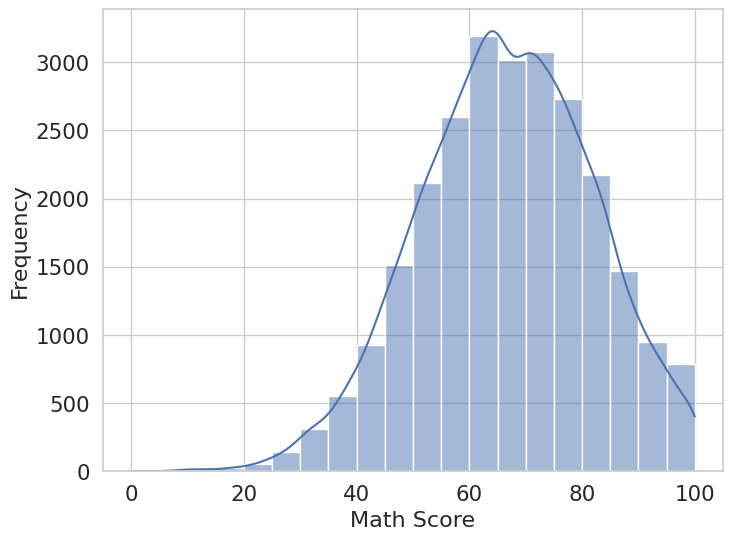

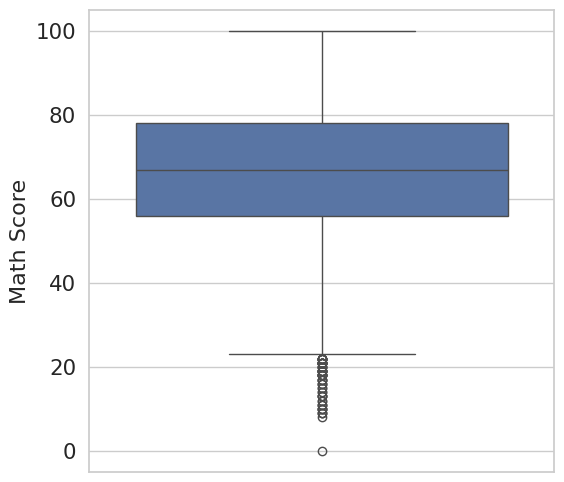

In [ ]:
# Print summary statistics for sales price
print(df['MathScore'].describe())

# Draw histogram
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=df['MathScore'], bins=20, kde=True)
plt.xlabel("Math Score", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: "{:,}".format(int(x)))) # Format the x-axis tick labels with commas
plt.show()
plt.close()

# Draw boxplot
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
sns.boxplot(df['MathScore'])
plt.ylabel("Math Score", fontsize=16)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: "{:,}".format(int(x)))) # Format the x-axis tick labels with commas
plt.xticks([]) # remove x axis ticks
plt.show()
plt.close()

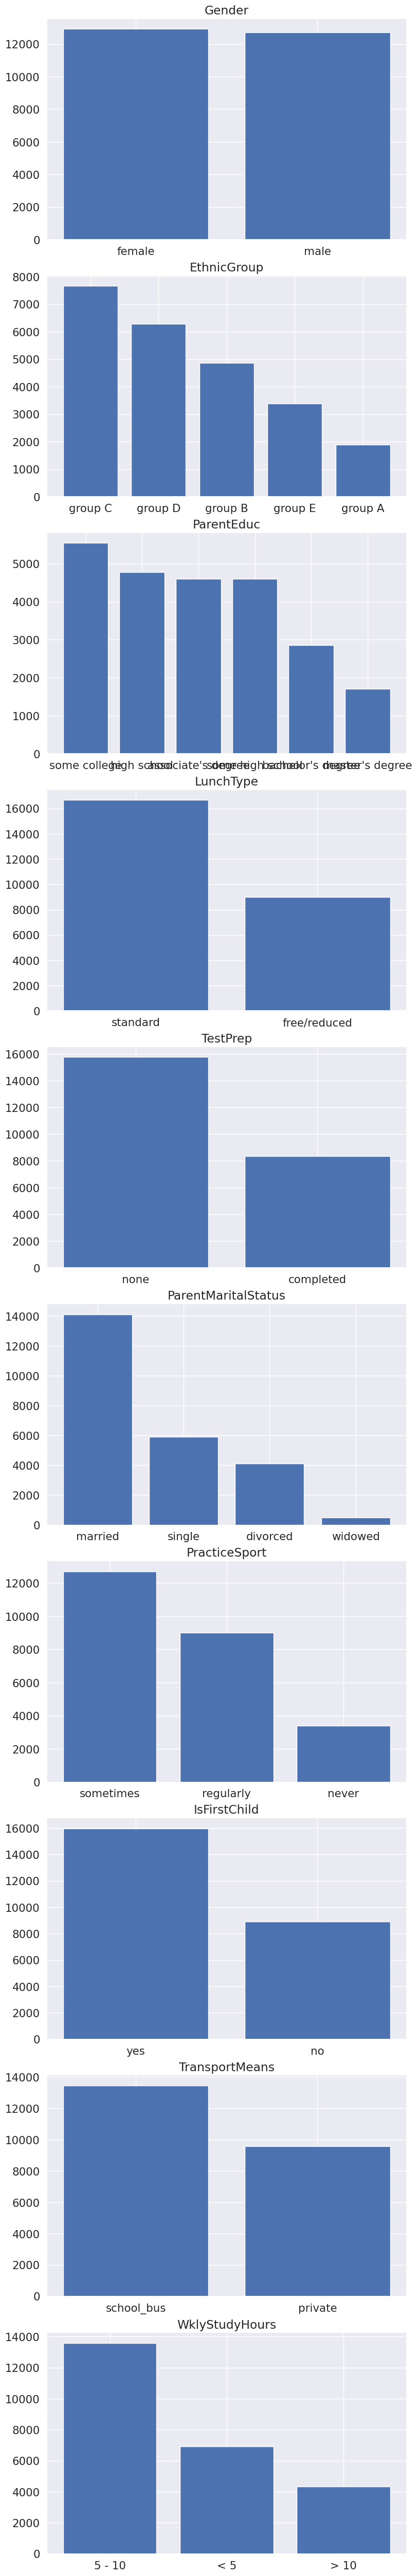

In [ ]:
string_columns = [col for col in df.columns if df[col].dtype == 'object']
fig, axs = plt.subplots(len(string_columns),figsize=(8,50),constrained_layout=True)
i=0
for col in string_columns:
  t = df[col].value_counts()
  axs[i].bar(t.index,t.values)
  axs[i].set_title(col)
  axs[i].autoscale_view()
  i+=1


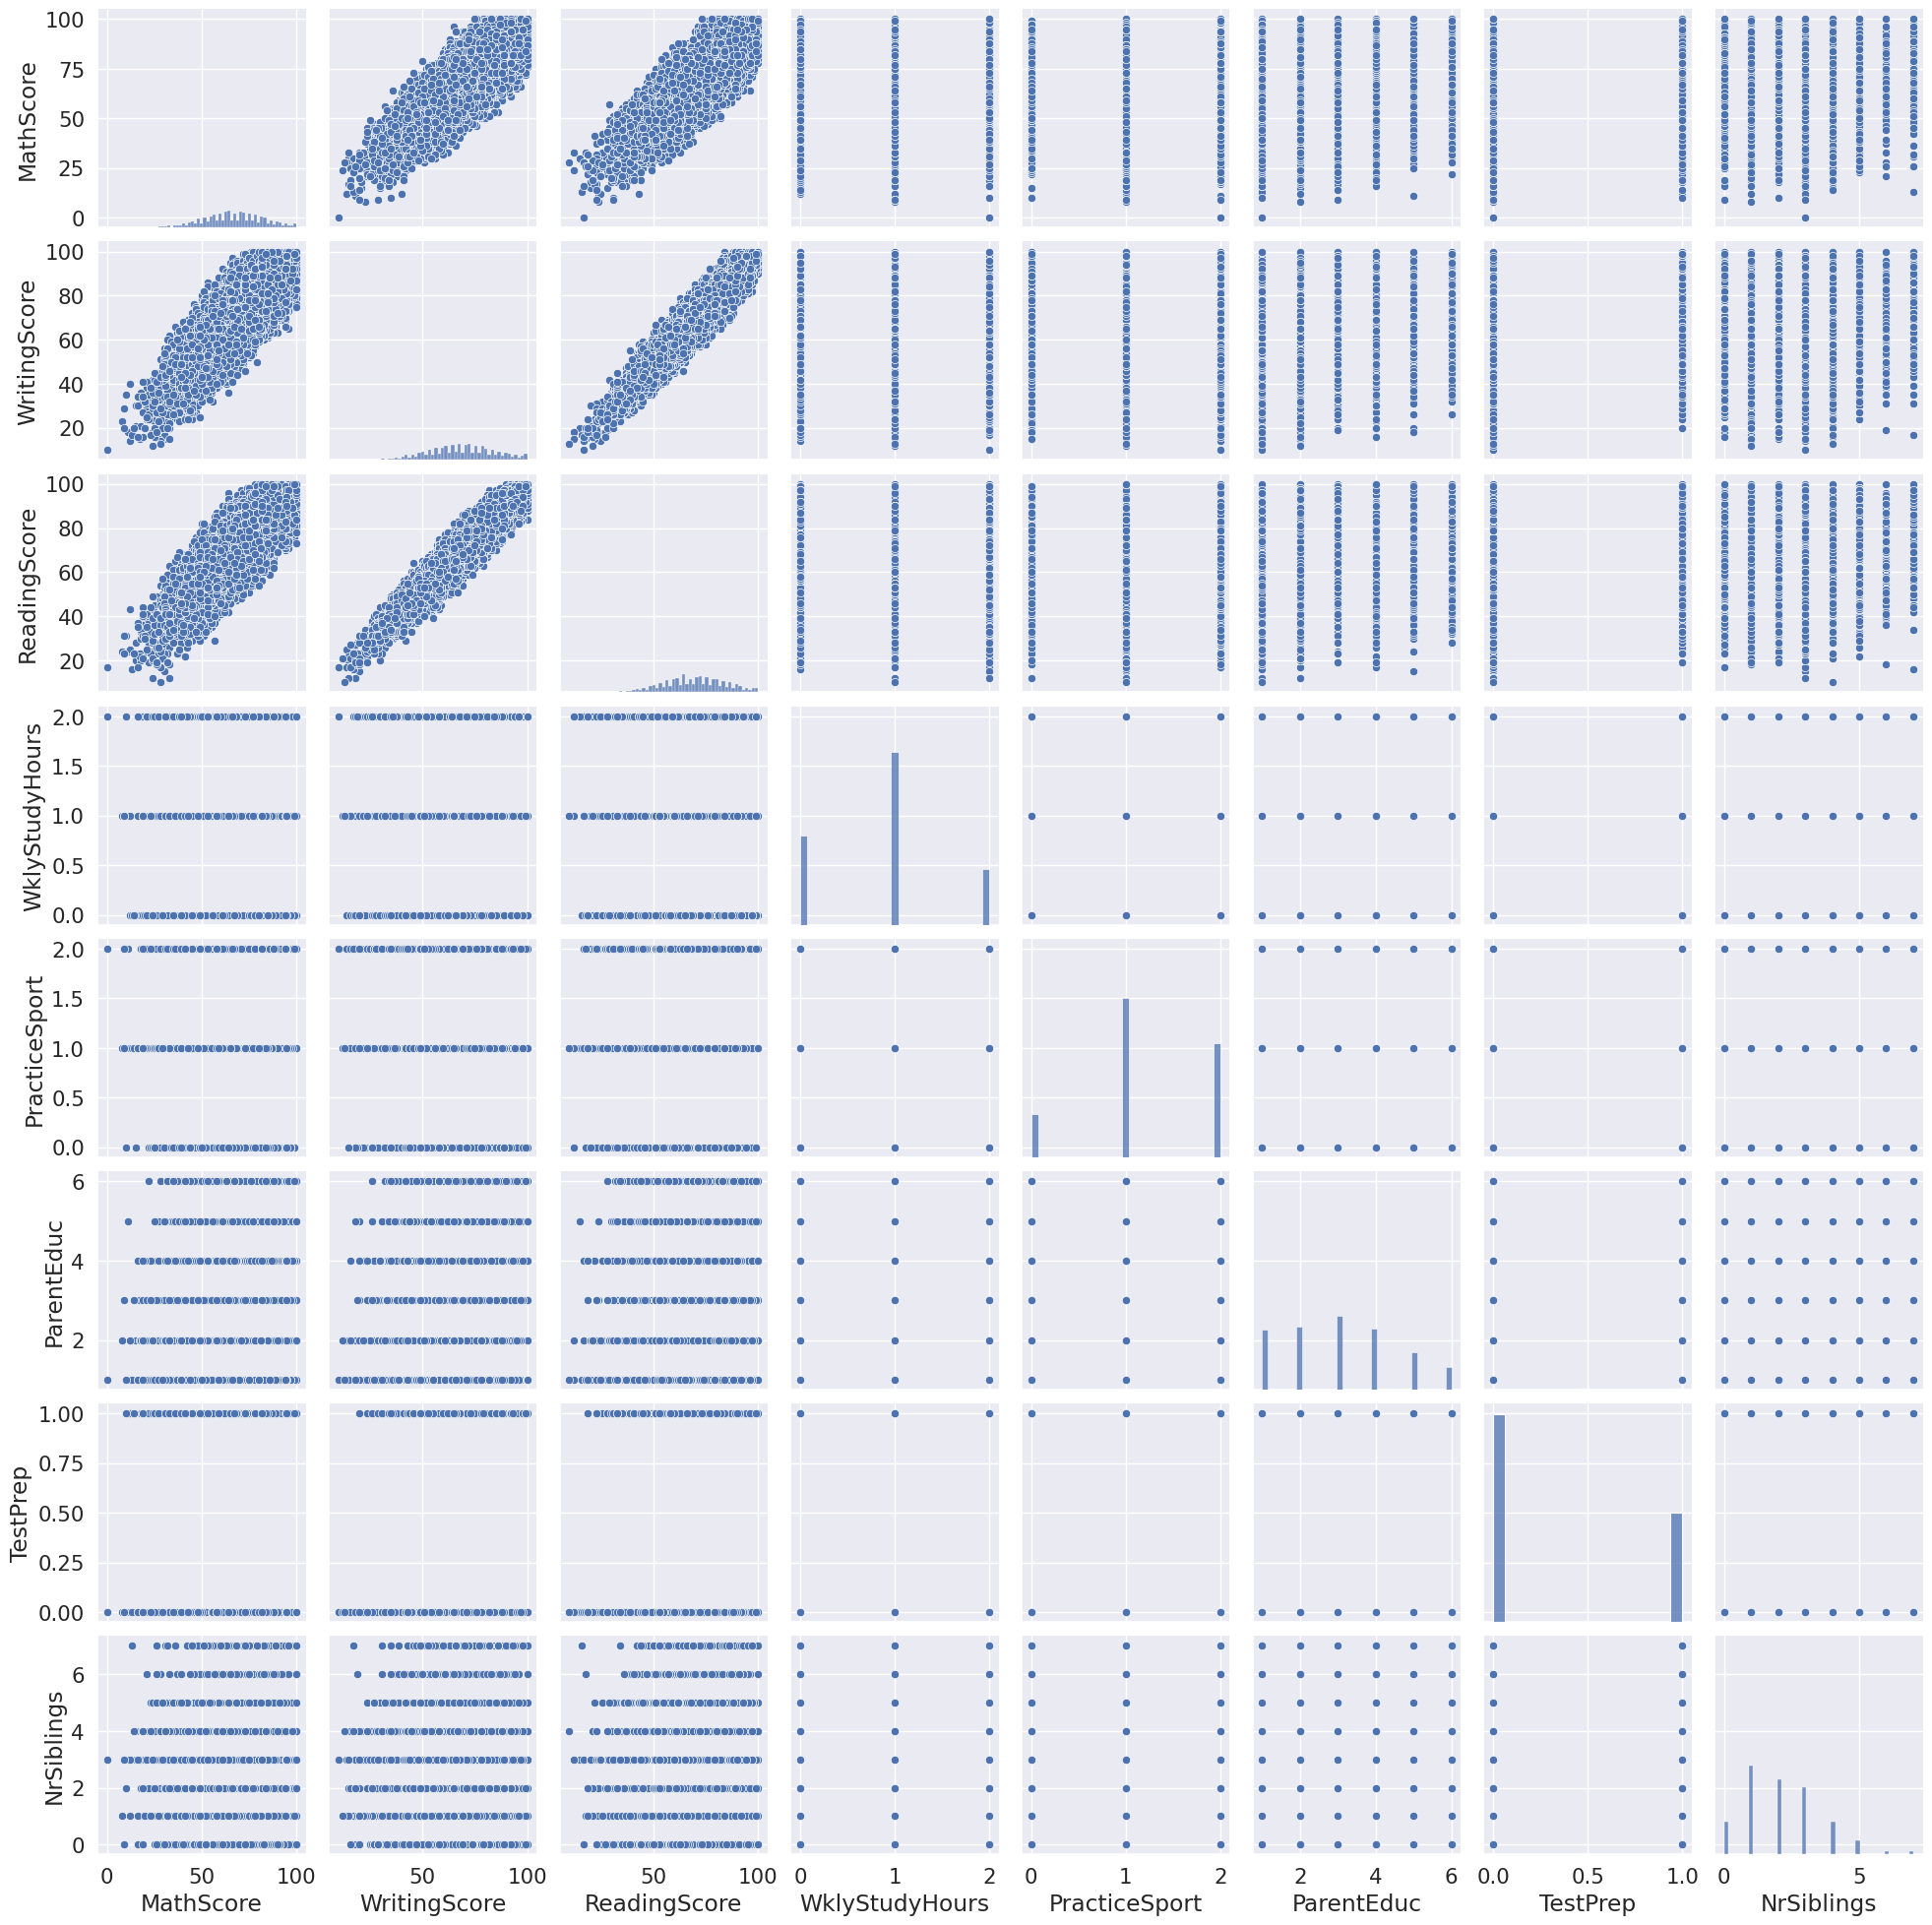

In [ ]:
sns.pairplot(df[['MathScore', 'WritingScore', 'ReadingScore', 'WklyStudyHours', 'PracticeSport', 'ParentEduc', 'TestPrep', 'NrSiblings' ]])

The pairplot shows that reading score and writing score are strongly correlated with the target variable, and each other. Parent education and number of siblings are also positively correlated with the target, although to a lesser extent.

#Pre-processing

### Missing Values
Missing values in our dataset impact the predictive power of our model. For this project, rows containing missing values with less than 10% of the data missing were simply removed. For the variable transport means, missing values totaled > 10% so they were imputed by assigning them the most common value.

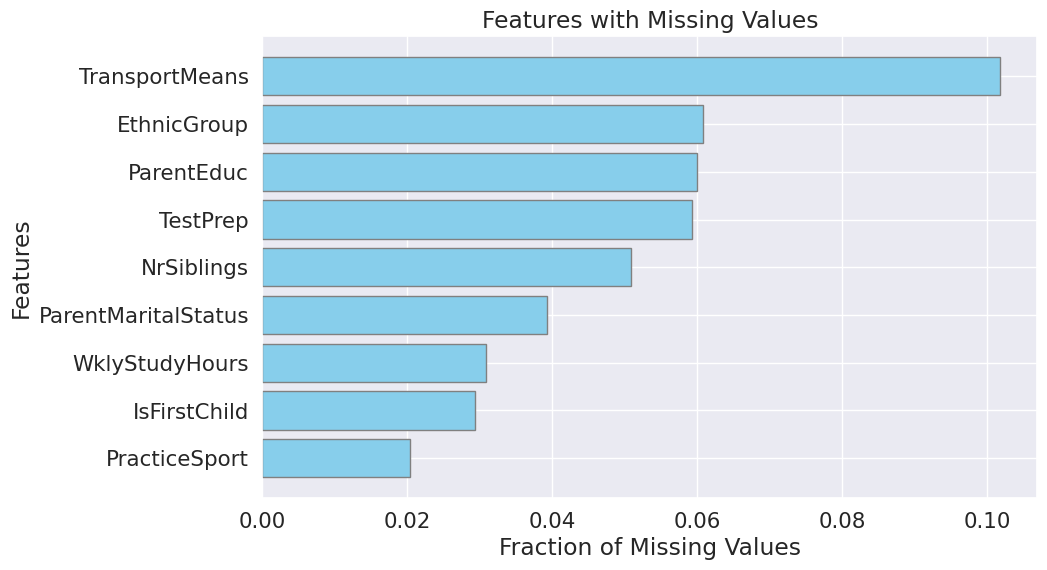

In [ ]:
#plotting features and corresponding missing value counts
feature_nan = df.isna().sum() / df.shape[0]
feature_nan = feature_nan[feature_nan > 0.0]
feature_nan = feature_nan.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.4)

# Create a horizontal bar plot
plt.barh(feature_nan.index, feature_nan.values, color='skyblue', edgecolor='gray')

# Add labels and a title
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Features")
plt.title("Features with Missing Values")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#assigning mode of transport_means to missing entries
df['TransportMeans'] = df['TransportMeans'].fillna(df['TransportMeans'].mode().iloc[0])

In [ ]:
#dropping null rows
df = df.dropna()

##Mapping variables

Variables with non-numerical values may be either ordinal or nominal. Ordinal variables represent values that have an inherent order, and are thus mapped to integer values "1, 2, 3..", whereas nominal variables do not have an order, and thus are encoded, to give each variable value an equal weightage in the model.

### Apply Ordinal Mapping to Relevant Features


In [ ]:
# Define the ordinal mapping
ordinal_mapping = {

    '> 10': 2,
    '5 - 10': 1,
    '< 5': 0,

    'regularly': 2,
    'sometimes': 1,
    'never': 0,

    "master's degree": 6,
    "bachelor's degree" : 5,
    "associate's degree": 4,
    'some college': 3,
    'high school': 2,
    'some high school': 1,

    'none': 0,
    'completed': 1,


}



# List of columns to apply ordinal mapping to
columns_to_map = ['WklyStudyHours', 'PracticeSport', 'ParentEduc', 'TestPrep']

# Function to apply ordinal mapping to a column
def apply_ordinal_mapping(column, mapping):
    return column.map(mapping)

# Apply ordinal mapping to selected columns
for column in columns_to_map:
    df[column] = apply_ordinal_mapping(df[column], ordinal_mapping)

df[columns_to_map] = df[columns_to_map].fillna(0)

<ipython-input-168-63f77131982a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = apply_ordinal_mapping(df[column], ordinal_mapping)
<ipython-input-168-63f77131982a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = apply_ordinal_mapping(df[column], ordinal_mapping)
<ipython-input-168-63f77131982a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

### Convert Non-Ordinal Features to One-Hot-Encoding



In [ ]:
# Find remaining features of string type
string_columns = [col for col in df.columns if df[col].dtype == 'object']

# Convert string columns to one-hot encodings
df = pd.get_dummies(df, columns=string_columns, prefix=string_columns)

df

,ParentEduc,TestPrep,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,...,LunchType_free/reduced,LunchType_standard,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,IsFirstChild_no,IsFirstChild_yes,TransportMeans_private,TransportMeans_school_bus
2,4,0,0,1.0,1,45,56,42,False,True,...,True,False,False,True,False,False,True,False,False,True
3,3,1,0,1.0,1,85,93,89,True,False,...,False,True,False,False,False,True,True,False,True,False
4,2,1,1,3.0,2,65,64,68,False,True,...,True,False,False,False,True,False,True,False,True,False
7,4,0,1,1.0,1,40,52,43,False,True,...,False,True,True,False,False,False,False,True,False,True
8,2,0,2,1.0,1,66,82,74,True,False,...,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25635,3,0,2,2.0,1,58,53,49,False,True,...,False,True,False,True,False,False,True,False,False,True
25636,2,0,1,2.0,1,59,61,65,True,False,...,False,True,False,False,True,False,True,False,False,True
25637,2,0,2,1.0,1,58,53,51,False,True,...,False,True,False,False,True,False,True,False,True,False
25639,4,1,2,3.0,1,82,90,93,True,False,...,False,True,False,True,False,False,True,False,False,True


In [ ]:
#convert number of siblings to an integer type
df['NrSiblings'] = df['NrSiblings'].astype(int)

### Drop Highly Correlated Features

Correlated features essentially convey the same information, which can lead to model redundancy. Removing them reduces the complexity of the model and can make it more interpretable.


In [ ]:
# Set the correlation threshold for considering features as highly correlated
correlation_threshold = 0.95

# Iterate through pairs of features and measure the correlation
for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        feature1 = df.columns[i]
        feature2 = df.columns[j]
        correlation = df[feature1].corr(df[feature2])

        # Check if the correlation is above the threshold
        if abs(correlation) > correlation_threshold:
            print(f'High correlation between {feature1} and {feature2} (Correlation: {correlation:.2f})')

            # # Plot the highly correlated features
            # sns.scatterplot(x=feature1, y=feature2, data=df)
            # plt.xlabel(feature1)
            # plt.ylabel(feature2)
            # plt.title(f'Scatter Plot of {feature1} vs. {feature2}')
            # plt.show()

High correlation between ReadingScore and WritingScore (Correlation: 0.95)
High correlation between Gender_female and Gender_male (Correlation: -1.00)
High correlation between LunchType_free/reduced and LunchType_standard (Correlation: -1.00)
High correlation between IsFirstChild_no and IsFirstChild_yes (Correlation: -1.00)
High correlation between TransportMeans_private and TransportMeans_school_bus (Correlation: -1.00)


Several of the above variables, from their descriptions, convey the same information (like garageQual and GarageCond), so we remove them.

In [ ]:
df = df.drop(columns = 'Gender_male')
df = df.drop(columns = 'LunchType_standard')
df = df.drop(columns = 'IsFirstChild_no')
df = df.drop(columns = 'TransportMeans_school_bus')

In [ ]:
df

,ParentEduc,TestPrep,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,EthnicGroup_group A,...,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,LunchType_free/reduced,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,IsFirstChild_yes,TransportMeans_private
3,3,1,0,1,1,85,93,89,True,False,...,False,False,False,False,False,False,False,True,False,True
4,2,1,1,3,2,65,64,68,False,False,...,False,True,False,True,False,False,True,False,False,True
7,4,0,1,1,1,40,52,43,False,False,...,False,True,False,False,True,False,False,False,True,False
8,2,0,2,1,1,66,82,74,True,False,...,False,False,False,False,False,True,False,False,False,True
9,3,1,1,1,2,80,73,71,False,True,...,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25635,3,0,2,2,1,58,53,49,False,False,...,True,False,False,False,False,True,False,False,False,False
25636,2,0,1,2,1,59,61,65,True,False,...,False,True,False,False,False,False,True,False,False,False
25637,2,0,2,1,1,58,53,51,False,False,...,False,False,True,False,False,False,True,False,False,True
25639,4,1,2,3,1,82,90,93,True,False,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
#defining the variables that need to be scaled
cols_to_norm = ['MathScore','ReadingScore', 'WritingScore']

In [ ]:
df[cols_to_norm]=(df[cols_to_norm]-df[cols_to_norm].min())/(df[cols_to_norm].max()-df[cols_to_norm].min())

#Modelling

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
Index: 17929 entries, 2 to 25640
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ParentEduc                    17929 non-null  int64  
 1   TestPrep                      17929 non-null  int64  
 2   PracticeSport                 17929 non-null  int64  
 3   NrSiblings                    17929 non-null  int64  
 4   WklyStudyHours                17929 non-null  int64  
 5   MathScore                     17929 non-null  float64
 6   ReadingScore                  17929 non-null  float64
 7   WritingScore                  17929 non-null  float64
 8   Gender_female                 17929 non-null  bool   
 9   EthnicGroup_group A           17929 non-null  bool   
 10  EthnicGroup_group B           17929 non-null  bool   
 11  EthnicGroup_group C           17929 non-null  bool   
 12  EthnicGroup_group D           17929 non-null  bool   
 13  Ethnic

###Model 1: Full with OLS

In [ ]:
Y = df['MathScore']
X = df.drop('MathScore', axis = 1)

In [ ]:
#creating training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.1 , random_state=1)

In [ ]:
# ols model with intercept
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)
Y_and_all_X_model = sm.OLS(y_train, X_train.astype(float))

# fitted model and summary
Y_and_all_X_results = Y_and_all_X_model.fit()
print(Y_and_all_X_results.summary())

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     6237.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:29:04   Log-Likelihood:                -50142.
No. Observations:               16136   AIC:                         1.003e+05
Df Residuals:                   16117   BIC:                         1.005e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, Y_and_all_X_results.predict(X_val.astype(float)))

27.705736312603605

###Model 2: Three Variables
Noticing the summary from the previous model, three variables seemed much more influential than any others: reading score, writing score, and gender. Thus a model of only these three was fit to see whether it would reduce overfitting and lead to a lower validation error. Although these variables do account for most of the variance in the data, it was found through the slightly higher error that the other variables do significantly improve prediction.

In [ ]:
Y = df['MathScore']
X = df.drop('MathScore', axis = 1)

In [ ]:
X = X[[ 'ReadingScore', 'Gender_female', 'WritingScore']]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.1 , random_state=1)

In [ ]:
# ols model with intercept
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)
Y_and_3_X_model = sm.OLS(y_train, X_train.astype(float))

# fitted model and summary
Y_and_3_X_results = Y_and_3_X_model.fit()
print(Y_and_3_X_results.summary())

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 2.697e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:44:18   Log-Likelihood:                -52408.
No. Observations:               16136   AIC:                         1.048e+05
Df Residuals:                   16132   BIC:                         1.049e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4501      0.237     31.430

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, Y_and_3_X_results.predict(X_val.astype(float)))

37.88307158039768

###Model 3: OLS with feature selection using step-wise selection

To find a subset of variables that produce the best model, we use a type of stepwise variable selection method called forward selection, that starts with an empty model and adds variables to the model one-by-one based on which variable increases accuracy most, and stops adding when the model stops improving significantly.

In [ ]:
from sklearn.model_selection import train_test_split

def forward_subset_selection(X,y,my_test_size=0.5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=my_test_size, random_state=3)

  def processSubset(feature_set, X_train, y_train, X_test, y_test):
      # Fit model on feature_set and calculate RSS
      X_train = X_train.astype(float)
      model = sm.OLS(np.asarray(y_train),X_train[list(feature_set)])
      regr = model.fit()
      RMSE = np.sqrt( np.mean((regr.predict(X_test[list(feature_set)]) - y_test) ** 2) )
      return {'features':feature_set, 'model':regr, 'RMSE':RMSE}

  def forward(predictors, X_train, y_train, X_test, y_test):

      # Pull out predictors we still need to process
      remaining_predictors = [p for p in X_train.columns if p not in predictors]

      results = []

      for p in remaining_predictors:
          results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))

      # Wrap everything up in a nice dataframe
      models = pd.DataFrame(results)

      # Choose the model with the minimum RMSE
      best_model = models.loc[models['RMSE'].astype(float).idxmin()]

      # Return the best model, along with some other useful information about the model
      return best_model

  models_train = pd.DataFrame(columns=['RMSE', 'model'])

  predictors = []

  for i in range(1,len(X.columns)+1):
      models_train.loc[i] = forward(predictors, X_train, y_train, X_test, y_test)
      predictors = models_train.loc[i]['model'].model.exog_names

  plt.plot(models_train['RMSE'],'ob')
  plt.xlabel('# Predictors')
  plt.ylabel('RMSE')

  best_n_vars = models_train['RMSE'].astype(float).idxmin()
  best_RMSE = models_train['RMSE'].min()
  #Note: the plus 1 accounts for starting at 0 vs at 1 in the indexing
  plt.plot(best_n_vars, best_RMSE, 'or');
  plt.title(f"Best #Vars = {best_n_vars}")
  print("==========")
  print(f"Best number of vars found: {best_n_vars}")
  print(f"Best model found: {models_train.loc[best_n_vars]['model'].model.exog_names}")



In [ ]:
Y = df['MathScore']
X = df.drop('MathScore', axis = 1)

Best number of vars found: 17
Best model found: ['ReadingScore', 'Gender_female', 'WritingScore', 'PracticeSport', 'TestPrep', 'EthnicGroup_group E', 'WklyStudyHours', 'NrSiblings', 'IsFirstChild_yes', 'ParentMaritalStatus_married', 'ParentMaritalStatus_single', 'ParentMaritalStatus_divorced', 'ParentMaritalStatus_widowed', 'LunchType_free/reduced', 'ParentEduc', 'EthnicGroup_group C', 'EthnicGroup_group B']


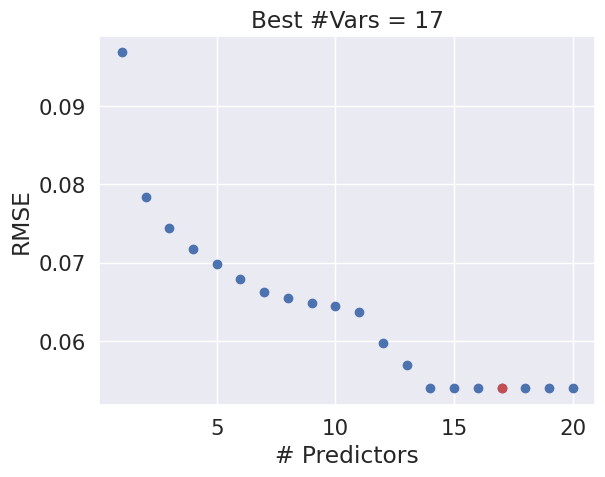

In [ ]:
forward_subset_selection(X,Y)

In [ ]:
X = X[['ReadingScore', 'Gender_female', 'WritingScore', 'PracticeSport', 'TestPrep', 'EthnicGroup_group E', 'WklyStudyHours', 'NrSiblings', 'IsFirstChild_yes', 'ParentMaritalStatus_married', 'ParentMaritalStatus_single', 'ParentMaritalStatus_divorced', 'ParentMaritalStatus_widowed', 'LunchType_free/reduced', 'ParentEduc', 'EthnicGroup_group C', 'EthnicGroup_group B']]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.1 , random_state=1)

In [ ]:
# ols model with intercept
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)
Y_and_fss_X_model = sm.OLS(y_train, X_train.astype(float))

# fitted model and summary
Y_and_fss_X_results = Y_and_fss_X_model.fit()
print(Y_and_fss_X_results.summary())

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     7017.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:45:18   Log-Likelihood:                -50143.
No. Observations:               16136   AIC:                         1.003e+05
Df Residuals:                   16119   BIC:                         1.005e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, Y_and_fss_X_results.predict(X_val.astype(float)))

27.720035179511314

###Model 4: Random Forest Regressor
Random Forest is an ensemble algorithm with its individual components being decision trees. Thus, it combines the output of several decision tree models to make its prediction. During training, the splitting at any level of a tree is contingent on a randomly selected subset of predictors. This principle helps avoid overfitting.

To determine the best value for how many trees to include, as well as what depth they should be expanded to, the grid search function from sklearn was used.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : [100,200,300,400,500,600], 'max_depth' : [1,3,5,7,10,13,15]}

rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)
clf.best_params_

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 10, 13, 15],
                         'n_estimators': [100, 200, 300, 400, 500, 600]})

In [ ]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 400, max_depth=10, random_state=1)
regr.fit(X_train, y_train)
mean_squared_error(y_val, regr.predict(X_val))

29.700363610030713

##Residual Plot

The final model selected was the full linear regression model based on MSE. To further assess this model, residual plots were created using the validation set. It shows random scatter of residuals with respect to the dependent variable and predictors and indicates the assumptions of a linear model are satisfied.

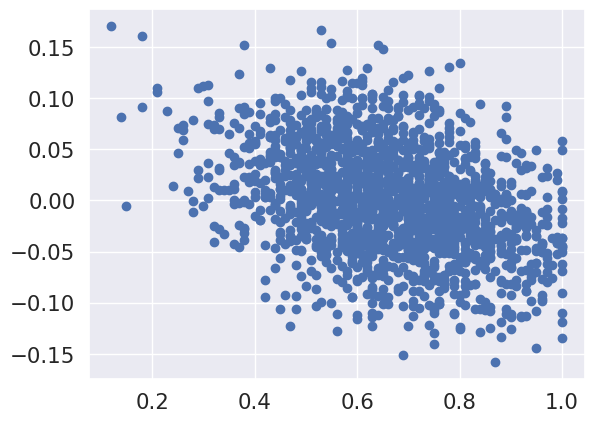

In [ ]:
plt.scatter(y_val, (Y_and_all_X_results.predict(X_val.astype(float)) - y_val))

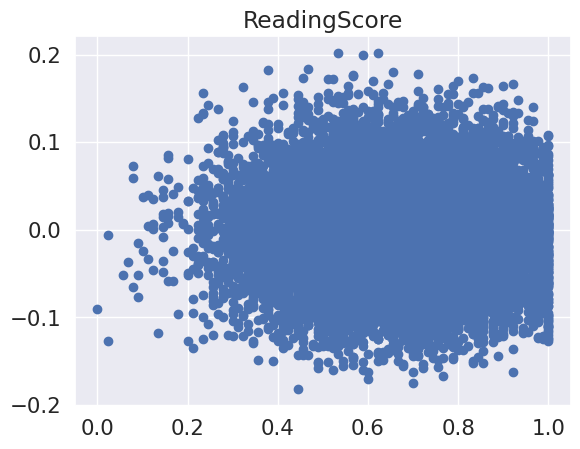

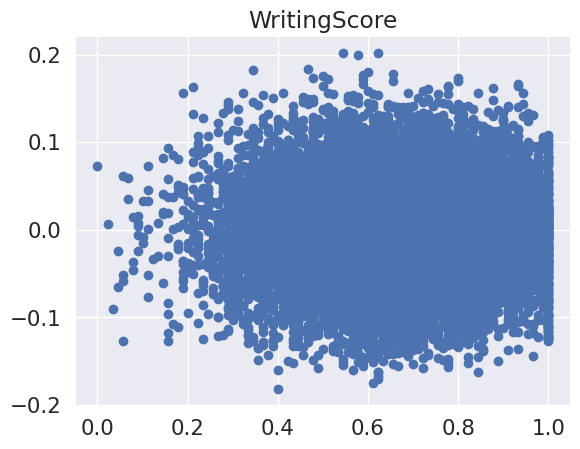

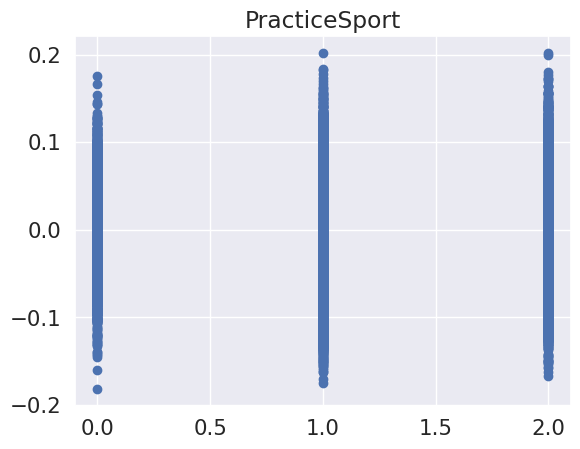

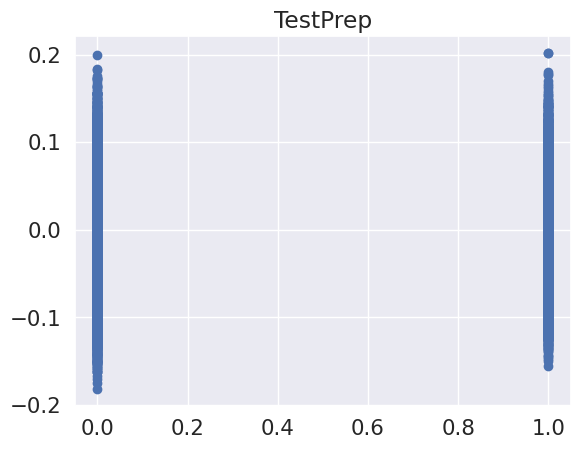

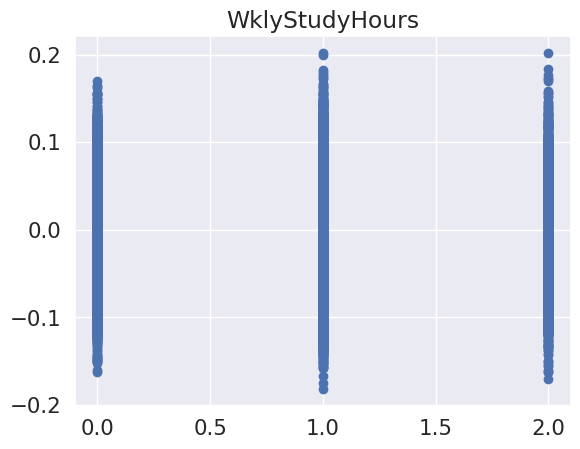

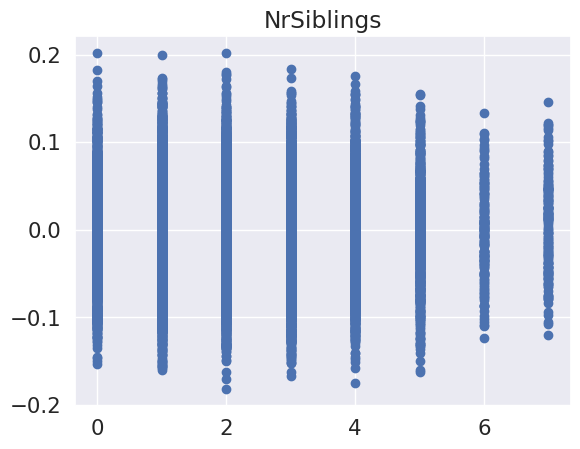

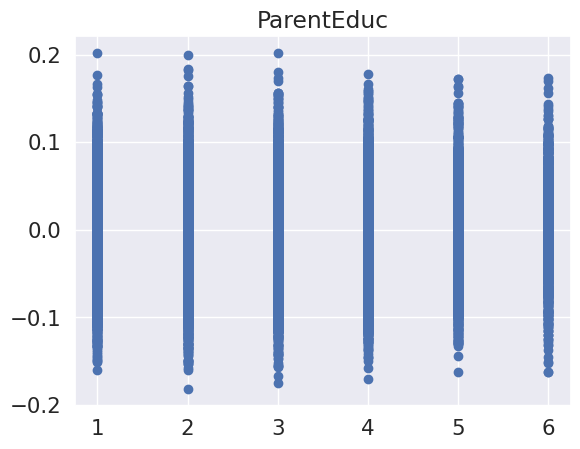

In [ ]:
for column in ['ReadingScore', 'WritingScore',
       'PracticeSport', 'TestPrep', 'WklyStudyHours',
       'NrSiblings', 'ParentEduc']:
  plt.scatter(X_train[column], (Y_and_all_X_results.predict(X_train.astype(float)) - y_train))
  plt.title(column)
  plt.show()

#Testing


In [ ]:
df1 = pd.read_csv('/content/student_scores_test (1) (1).csv')

In [ ]:
df1 = df1.drop('Unnamed: 0', axis=1)
df1.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,ReadingScore,WritingScore
0,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,93,91
1,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,78,75
2,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,84,79
3,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,43,39
4,female,group B,some high school,free/reduced,none,divorced,sometimes,yes,1.0,school_bus,5 - 10,32,28


### Missing Values
Fraction of Nan in Features

In [ ]:
df1['TransportMeans'] = df1['TransportMeans'].fillna(df1['TransportMeans'].mode().iloc[0])
df1 = df1.dropna()

### Apply Ordinal Mapping to Relevant Features

In [ ]:
# Define the ordinal mapping
ordinal_mapping = {

    '> 10': 2,
    '5 - 10': 1,
    '< 5': 0,

    'regularly': 2,
    'sometimes': 1,
    'never': 0,

    "master's degree": 6,
    "bachelor's degree" : 5,
    "associate's degree": 4,
    'some college': 3,
    'high school': 2,
    'some high school': 1,

    'none': 0,
    'completed': 1,


}



# List of columns to apply ordinal mapping to
columns_to_map = ['WklyStudyHours', 'PracticeSport', 'ParentEduc', 'TestPrep']

# Function to apply ordinal mapping to a column
def apply_ordinal_mapping(column, mapping):
    return column.map(mapping)

# Apply ordinal mapping to selected columns
for column in columns_to_map:
    df1[column] = apply_ordinal_mapping(df1[column], ordinal_mapping)

df1[columns_to_map] = df1[columns_to_map].fillna(0)

### Convert Non-Ordinal String to One-Hot-Encoding


In [ ]:
# Find remaining features of string type
string_columns = [col for col in df1.columns if df1[col].dtype == 'object']

# Convert string columns to one-hot encodings
df1 = pd.get_dummies(df1, columns=string_columns, prefix=string_columns)

df1

,ParentEduc,TestPrep,PracticeSport,NrSiblings,WklyStudyHours,ReadingScore,WritingScore,Gender_female,Gender_male,EthnicGroup_group A,...,LunchType_free/reduced,LunchType_standard,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,IsFirstChild_no,IsFirstChild_yes,TransportMeans_private,TransportMeans_school_bus
0,6,0,1,4.0,0,93,91,True,False,False,...,False,True,False,False,True,False,False,True,False,True
1,3,0,1,0.0,1,78,75,False,True,False,...,False,True,False,True,False,False,False,True,False,True
2,4,0,2,1.0,1,84,79,True,False,False,...,False,True,False,True,False,False,False,True,False,True
3,3,0,1,1.0,2,43,39,False,True,False,...,True,False,False,True,False,False,False,True,True,False
4,1,0,1,1.0,1,32,28,True,False,False,...,True,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,5,0,2,4.0,0,56,50,False,True,False,...,False,True,False,True,False,False,True,False,False,True
4992,3,1,2,3.0,0,80,80,True,False,False,...,False,True,False,True,False,False,True,False,False,True
4994,2,0,2,2.0,1,66,65,True,False,False,...,False,True,True,False,False,False,True,False,True,False
4997,4,0,1,1.0,0,65,58,True,False,False,...,False,True,False,True,False,False,True,False,True,False


In [ ]:
df1 = df1.drop(columns = 'Gender_male')
df1 = df1.drop(columns = 'LunchType_standard')
#df1 = df1.drop(columns = 'TestPrep_none')
df1 = df1.drop(columns = 'IsFirstChild_no')
df1 = df1.drop(columns = 'TransportMeans_school_bus')

In [ ]:
df1

,ParentEduc,TestPrep,PracticeSport,NrSiblings,WklyStudyHours,ReadingScore,WritingScore,Gender_female,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,LunchType_free/reduced,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,IsFirstChild_yes,TransportMeans_private
0,6,0,1,4.0,0,93,91,True,False,True,False,False,False,False,False,False,True,False,True,False
1,3,0,1,0.0,1,78,75,False,False,False,True,False,False,False,False,True,False,False,True,False
2,4,0,2,1.0,1,84,79,True,False,True,False,False,False,False,False,True,False,False,True,False
3,3,0,1,1.0,2,43,39,False,False,True,False,False,False,True,False,True,False,False,True,True
4,1,0,1,1.0,1,32,28,True,False,True,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,5,0,2,4.0,0,56,50,False,False,False,False,False,True,False,False,True,False,False,False,False
4992,3,1,2,3.0,0,80,80,True,False,False,False,True,False,False,False,True,False,False,False,False
4994,2,0,2,2.0,1,66,65,True,False,False,False,False,True,False,True,False,False,False,False,True
4997,4,0,1,1.0,0,65,58,True,False,False,True,False,False,False,False,True,False,False,False,True


In [ ]:
X_test = df1
X_test = sm.add_constant(X_test)

In [ ]:
predictions = Y_and_all_X_results.predict(X_test).fillna(0)

#convert the predictions to a LIST of POSITIVE INTEGERS (do not submit decimals!)
list_predictions = predictions.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)

[81, 81, 73, 45, 21, 59, 65, 76, 90, 55, 80, 77, 49, 25, 54, 76, 68, 73, 88, 55, 70, 66, 73, 63, 86, 50, 55, 83, 87, 54, 60, 55, 87, 47, 70, 73, 52, 27, 81, 65, 22, 66, 76, 56, 31, 65, 57, 67, 54, 51, 81, 28, 76, 72, 71, 68, 79, 70, 57, 85, 74, 50, 85, 59, 56, 45, 73, 66, 70, 62, 51, 68, 77, 72, 60, 50, 71, 83, 54, 65, 64, 82, 74, 54, 73, 60, 64, 62, 53, 50, 92, 85, 55, 66, 57, 88, 70, 71, 71, 49, 85, 70, 74, 61, 78, 70, 83, 92, 59, 47, 67, 44, 69, 49, 66, 55, 69, 59, 65, 67, 44, 85, 57, 66, 53, 53, 67, 67, 79, 69, 91, 34, 59, 49, 46, 73, 88, 59, 57, 90, 75, 60, 83, 86, 63, 67, 67, 63, 80, 56, 63, 76, 59, 57, 88, 78, 50, 58, 55, 68, 80, 60, 76, 47, 54, 68, 48, 76, 66, 56, 89, 41, 63, 53, 83, 83, 82, 50, 76, 72, 68, 56, 60, 61, 70, 67, 66, 65, 52, 44, 78, 71, 36, 71, 89, 77, 82, 81, 68, 85, 68, 79, 73, 79, 86, 83, 59, 64, 86, 89, 87, 31, 69, 62, 67, 79, 93, 60, 64, 42, 62, 54, 43, 69, 83, 64, 59, 73, 81, 44, 58, 67, 73, 73, 67, 66, 62, 44, 92, 54, 56, 71, 74, 56, 52, 76, 51, 49, 73, 68,